In [27]:
# Import all important libraries
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf

print("Setup complete ✅")


Setup complete ✅


In [28]:
# Load the used cars dataset
df = pd.read_csv('/content/used_cars.csv')

# Check first few rows
df.head()


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [29]:
# Clean 'milage' column: Remove 'mi.' and ',' and convert to integer
df['milage'] = df['milage'].str.replace('mi.', '')
df['milage'] = df['milage'].str.replace(',', '')
df['milage'] = df['milage'].astype(float)

# Clean 'price' column: Remove '$' and ',' and convert to integer
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype(float)

# Confirm cleaning
df[['milage', 'price']].head()


,milage,price
0,51000.0,10300.0
1,34742.0,38005.0
2,22372.0,54598.0
3,88900.0,15500.0
4,9835.0,34999.0


In [30]:
# Fill missing 'clean_title' with 'Unknown'
df['clean_title'] = df['clean_title'].fillna('Unknown')


In [31]:
from sklearn.preprocessing import LabelEncoder

# List of simple categorical columns
categorical_cols = ['brand', 'fuel_type', 'transmission', 'ext_col', 'int_col', 'clean_title']

# Apply Label Encoding
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Optional: Drop very text-heavy columns for simplicity
df = df.drop(['model', 'engine', 'accident'], axis=1)

# Confirm
df.head()


,brand,model_year,milage,fuel_type,transmission,ext_col,int_col,clean_title,price
0,14,2013,51000.0,1,16,29,14,1,10300.0
1,19,2021,34742.0,2,32,185,71,1,38005.0
2,27,2022,22372.0,2,40,38,14,0,54598.0
3,20,2015,88900.0,3,23,29,14,1,15500.0
4,3,2021,9835.0,2,32,120,14,0,34999.0


In [32]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop('price', axis=1)
y = df['price']

# Train-Test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split complete ✅")
print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)


Data split complete ✅
Training samples: (3207, 8)
Testing samples: (802, 8)


In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K

# Custom RMSE and R² metrics
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

def r2_score(y_true, y_pred):
    ss_total = K.sum(K.square(y_true - K.mean(y_true)))
    ss_residual = K.sum(K.square(y_true - y_pred))
    return 1 - ss_residual / (ss_total + K.epsilon())

# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # first hidden layer
    Dense(64, activation='relu'),                                    # second hidden layer
    Dense(32, activation='relu'),                                    # third hidden layer
    Dense(1)  # output layer - no activation (for regression)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='mean_absolute_error',  # MAE is good for regression
    metrics=['mean_absolute_error', 'mean_squared_error', rmse, r2_score]  # Include MAE, MSE, RMSE, R²
)

# Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # 20% of training data used for validation
    epochs=10,             # number of full passes over the data
    batch_size=32,         # number of samples per batch
    verbose=1              # print training progress
)


Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 35836.6914 - mean_absolute_error: 35836.6914 - mean_squared_error: 3489336064.0000 - r2_score: -1.1500 - rmse: 55115.0781 - val_loss: 35273.1406 - val_mean_absolute_error: 35273.1406 - val_mean_squared_error: 3596620288.0000 - val_r2_score: -0.8961 - val_rmse: 54869.9414
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33035.4727 - mean_absolute_error: 33035.4727 - mean_squared_error: 4067408896.0000 - r2_score: -0.4893 - rmse: 58146.1641 - val_loss: 21044.1816 - val_mean_absolute_error: 21044.1816 - val_mean_squared_error: 2191121664.0000 - val_r2_score: 0.1348 - val_rmse: 40350.5156
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20748.0391 - mean_absolute_error: 20748.0391 - mean_squared_error: 2153501696.0000 - r2_score: 0.2123 - rmse: 39585.2383 - val_loss: 19471.9062 - val_mean_absolute_error: 19471.9062 - val_mean_squared_error: 1891333632.0000 - val_r2_score: 0.2289 - val_rmse: 37445.2305
Epoch 4/10
81

In [35]:
# Evaluate model on test data
test_loss, test_mae, test_mse, test_rmse, test_r2 = model.evaluate(X_test, y_test)

# Print results
print(f"Test MAE: {test_mae:.2f} dollars")
print(f"Test MSE: {test_mse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test R²: {test_r2:.2f}")


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31368.4961 - mean_absolute_error: 31368.4961 - mean_squared_error: 33195016192.0000 - r2_score: 0.3078 - rmse: 96880.3203
Test MAE: 27183.19 dollars
Test MSE: 19539503104.00
Test RMSE: 73534.77
Test R²: 0.26


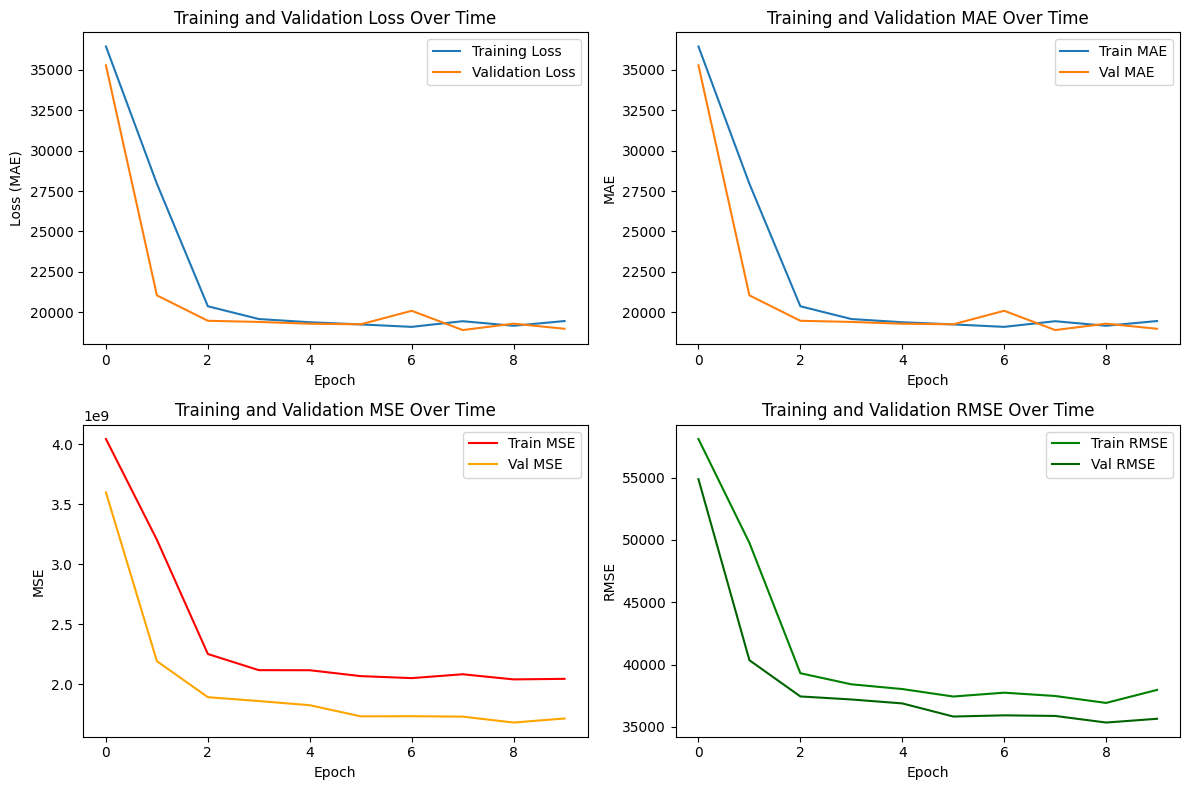

In [36]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 8))

# Loss curve
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MAE)')
plt.legend()
plt.title('Training and Validation Loss Over Time')

# MAE curve
plt.subplot(2, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Val MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('Training and Validation MAE Over Time')

# MSE curve
plt.subplot(2, 2, 3)
plt.plot(history.history['mean_squared_error'], label='Train MSE', color='r')
plt.plot(history.history['val_mean_squared_error'], label='Val MSE', color='orange')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.title('Training and Validation MSE Over Time')

# RMSE curve
plt.subplot(2, 2, 4)
plt.plot(history.history['rmse'], label='Train RMSE', color='g')
plt.plot(history.history['val_rmse'], label='Val RMSE', color='darkgreen')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.title('Training and Validation RMSE Over Time')

plt.tight_layout()
plt.show()


In [38]:
# Make predictions
y_pred = model.predict(X_test)

# Compare first 10 predictions with actual prices
for i in range(10):
    print(f"Predicted Price: ${y_pred[i][0]:,.2f} | Actual Price: ${y_test.iloc[i]:,.2f}")


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Predicted Price: $36,727.79 | Actual Price: $28,000.00
Predicted Price: $28,395.34 | Actual Price: $5,900.00
Predicted Price: $24,051.40 | Actual Price: $41,000.00
Predicted Price: $48,937.07 | Actual Price: $40,250.00
Predicted Price: $48,196.95 | Actual Price: $77,999.00
Predicted Price: $22,935.87 | Actual Price: $35,899.00
Predicted Price: $58,276.32 | Actual Price: $36,000.00
Predicted Price: $56,505.85 | Actual Price: $47,214.00
Predicted Price: $31,297.86 | Actual Price: $30,900.00
Predicted Price: $18,011.26 | Actual Price: $11,000.00


In [39]:
# Save the model
model.save('used_car_price_model.keras')

print("Model saved as 'used_car_price_model.keras' ✅")


Model saved as 'used_car_price_model.keras' ✅
